In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston

data = load_boston()

print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['y'] = data.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


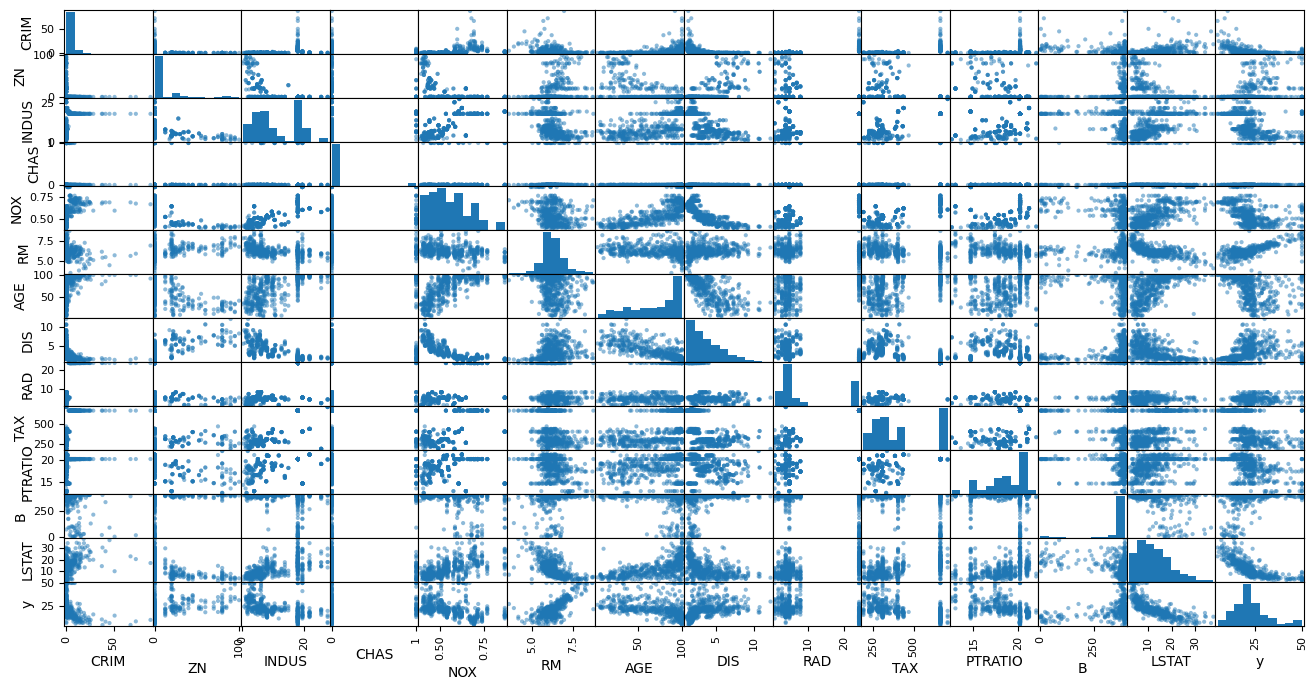

In [5]:
## 데이터 선형관계 확인

plt.figure(figsize=(16, 8))
ax = plt.subplot(1, 1, 1)
pd.plotting.scatter_matrix(df, ax=ax)
plt.show()

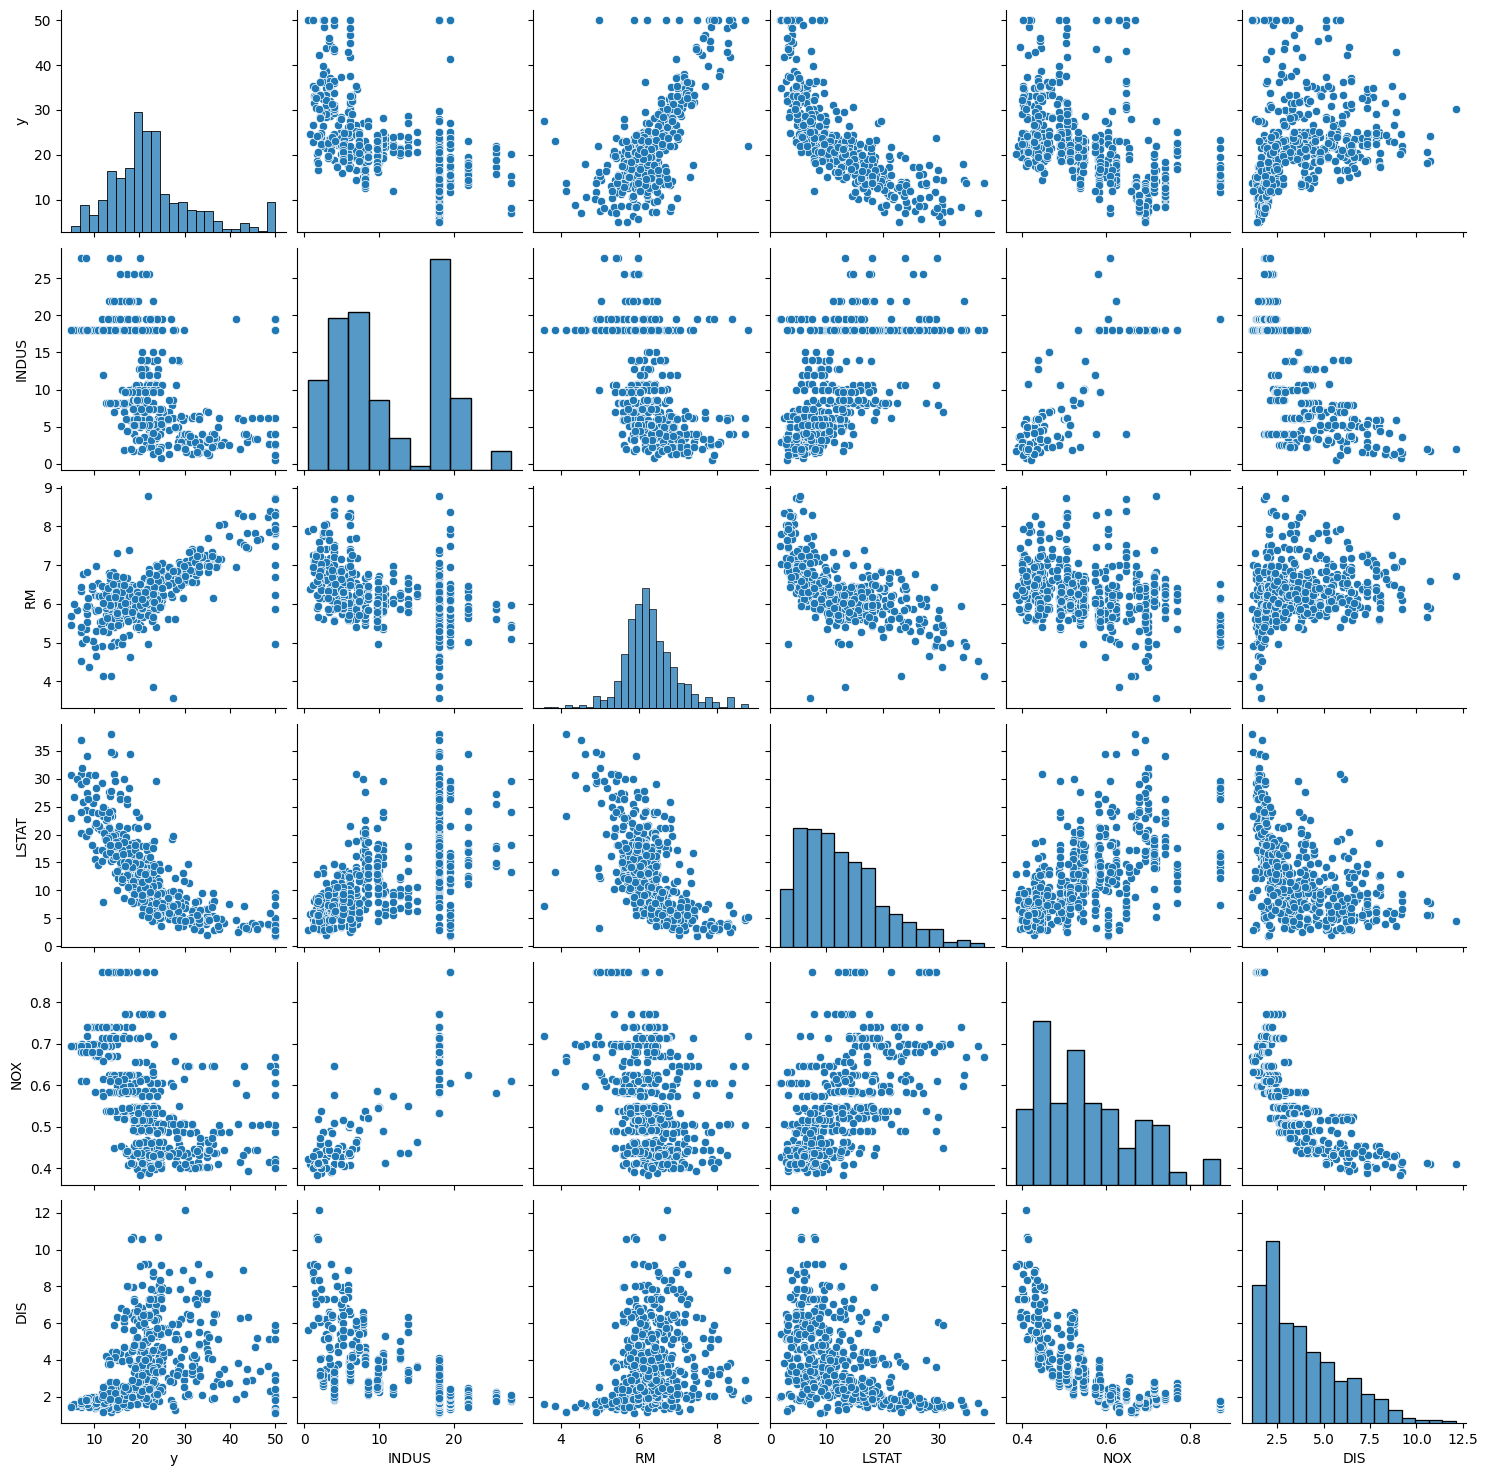

In [6]:
cols = ['y', 'INDUS', 'RM', 'LSTAT', 'NOX', 'DIS']
sns.pairplot(df[cols])
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
data = torch.from_numpy(df[cols].values).float()
print(data[:3])
print(data.shape)

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671]])
torch.Size([506, 6])


In [9]:
y = data[:, :1]
X = data[:, 1:]

print(X.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [10]:
n_epochs = 2000
lr = 1e-3
print_interval = 100

model = nn.Linear(X.size(-1),  # Input Features
                y.size(-1),    # Output Features
                bias = True)   # bias 포함여부
print(model)

Linear(in_features=5, out_features=1, bias=True)


In [11]:
optimizer = optim.SGD(model.parameters(),
                    lr= lr)

In [12]:
for i in range(n_epochs):
    y_hat = model(X)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad() # Gradient Descent 자동으로 수행해줌
    loss.backward()

    optimizer.step()      # step => 1번 gradient descent 실행

    if (i + 1) % print_interval == 0:
        print('Epoch %d : loss%.4e' % (i+1, loss))

## 29에서 멈춤 ... (Loss)

Epoch 100 : loss4.4644e+01
Epoch 200 : loss3.7717e+01
Epoch 300 : loss3.3887e+01
Epoch 400 : loss3.1729e+01
Epoch 500 : loss3.0512e+01
Epoch 600 : loss2.9826e+01
Epoch 700 : loss2.9439e+01
Epoch 800 : loss2.9221e+01
Epoch 900 : loss2.9098e+01
Epoch 1000 : loss2.9028e+01
Epoch 1100 : loss2.8988e+01
Epoch 1200 : loss2.8966e+01
Epoch 1300 : loss2.8953e+01
Epoch 1400 : loss2.8945e+01
Epoch 1500 : loss2.8941e+01
Epoch 1600 : loss2.8938e+01
Epoch 1700 : loss2.8936e+01
Epoch 1800 : loss2.8934e+01
Epoch 1900 : loss2.8933e+01
Epoch 2000 : loss2.8932e+01


In [13]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(),
                columns = ['y', 'y_hat'])

df.head()            


,y,y_hat
0,24.000000,30.272808
1,21.600000,25.324341
2,34.700001,32.555668
3,33.400002,32.386063
4,36.200001,31.752024


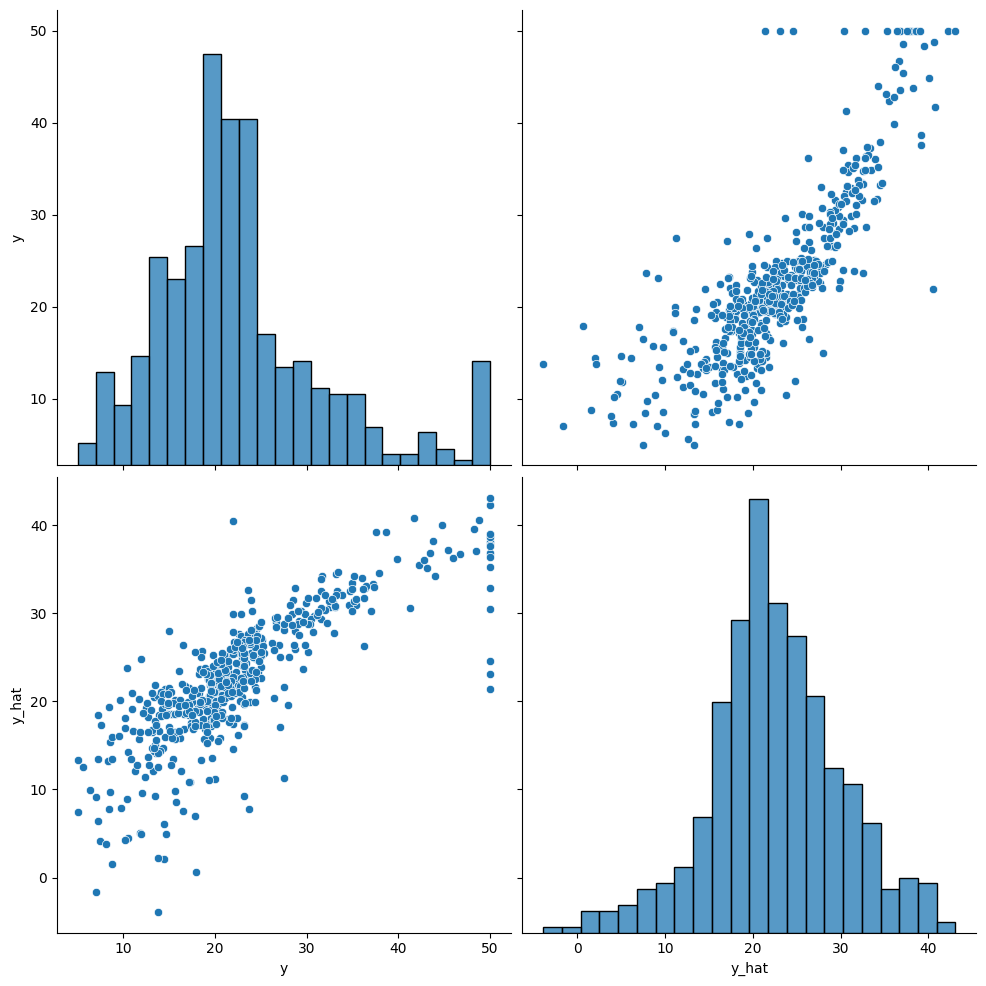

In [14]:
sns.pairplot(df, height=5)
plt.show()